# Introduction

Talk about the purpose of this stage of data exploration and normalization.
Quick summary of the topics we will be covering

# 1. Preparation Stage

## 1.A. Importing Data 

In [8]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from IPython.display import *
import ipywidgets as widgets
from ipywidgets import *
from IPython.display import clear_output
import seaborn as sns

In [9]:
df = pd.read_csv('../Data/dataset_clean.csv')
print(df.head(5))

   cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0    155   -0.0013    0.0005     100.0  518.67  643.05  1588.40  1418.81   
1    138    0.0032    0.0003     100.0  518.67  643.39  1604.19  1417.20   
2     93    0.0012   -0.0002     100.0  518.67  642.64  1600.04  1412.99   
3    160    0.0007    0.0004     100.0  518.67  643.04  1599.27  1412.75   
4     73    0.0001    0.0001     100.0  518.67  642.35  1588.43  1409.32   

      s5     s6  ...      s13      s14     s15   s16  s17   s18    s19    s20  \
0  14.62  21.61  ...  2388.20  8130.89  8.4631  0.03  394  2388  100.0  38.74   
1  14.62  21.61  ...  2388.15  8129.88  8.4864  0.03  393  2388  100.0  38.68   
2  14.62  21.61  ...  2388.16  8122.66  8.4484  0.03  394  2388  100.0  38.68   
3  14.62  21.61  ...  2388.18  8120.11  8.4430  0.03  394  2388  100.0  38.86   
4  14.62  21.61  ...  2388.08  8137.42  8.4666  0.03  394  2388  100.0  39.17   

       s21  ttf  
0  23.1329   55  
1  23.1407   32  
2 

# 2. Feature Engineering

## 2.A. Feature Distribution

Dropdown(options=('cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8',…

<AxesSubplot:ylabel='Frequency'>

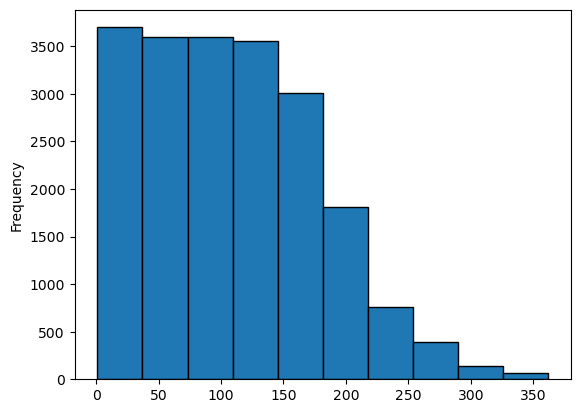

In [10]:
drop_down_distribuition = Dropdown(options = df.columns)
selected_distribuition = drop_down_distribuition.value

def dropdown_distribuition_handler(change):
    selected_distribuition = change.new 
    clear_output(wait=True)
    df[selected_distribuition].plot(kind='hist', edgecolor='black')
    display(drop_down_distribuition)
    
drop_down_distribuition.observe(dropdown_distribuition_handler, names='value')
display(drop_down_distribuition)
df[selected_distribuition].plot(kind='hist', edgecolor='black')

## 2.B. Feature Deviation

In [11]:
print(df.std())

cycle       6.888099e+01
setting1    2.187313e-03
setting2    2.930621e-04
setting3    0.000000e+00
s1          6.537152e-11
s2          5.000533e-01
s3          6.131150e+00
s4          9.000605e+00
s5          3.394700e-12
s6          1.388985e-03
s7          8.850923e-01
s8          7.098548e-02
s9          2.208288e+01
s10         4.660829e-13
s11         2.670874e-01
s12         7.375534e-01
s13         7.191892e-02
s14         1.907618e+01
s15         3.750504e-02
s16         1.556432e-14
s17         1.548763e+00
s18         0.000000e+00
s19         0.000000e+00
s20         1.807464e-01
s21         1.082509e-01
ttf         6.888099e+01
dtype: float64


## 2.C. Feature Correlation

Correlate between sensors and settings with ttf. Low correlation sensors and settings should be targeted on feature removal.
Check correlation between the other sensors (create heatmap). Remove one of the sensors for each pair that is highly correlated.


<AxesSubplot:>

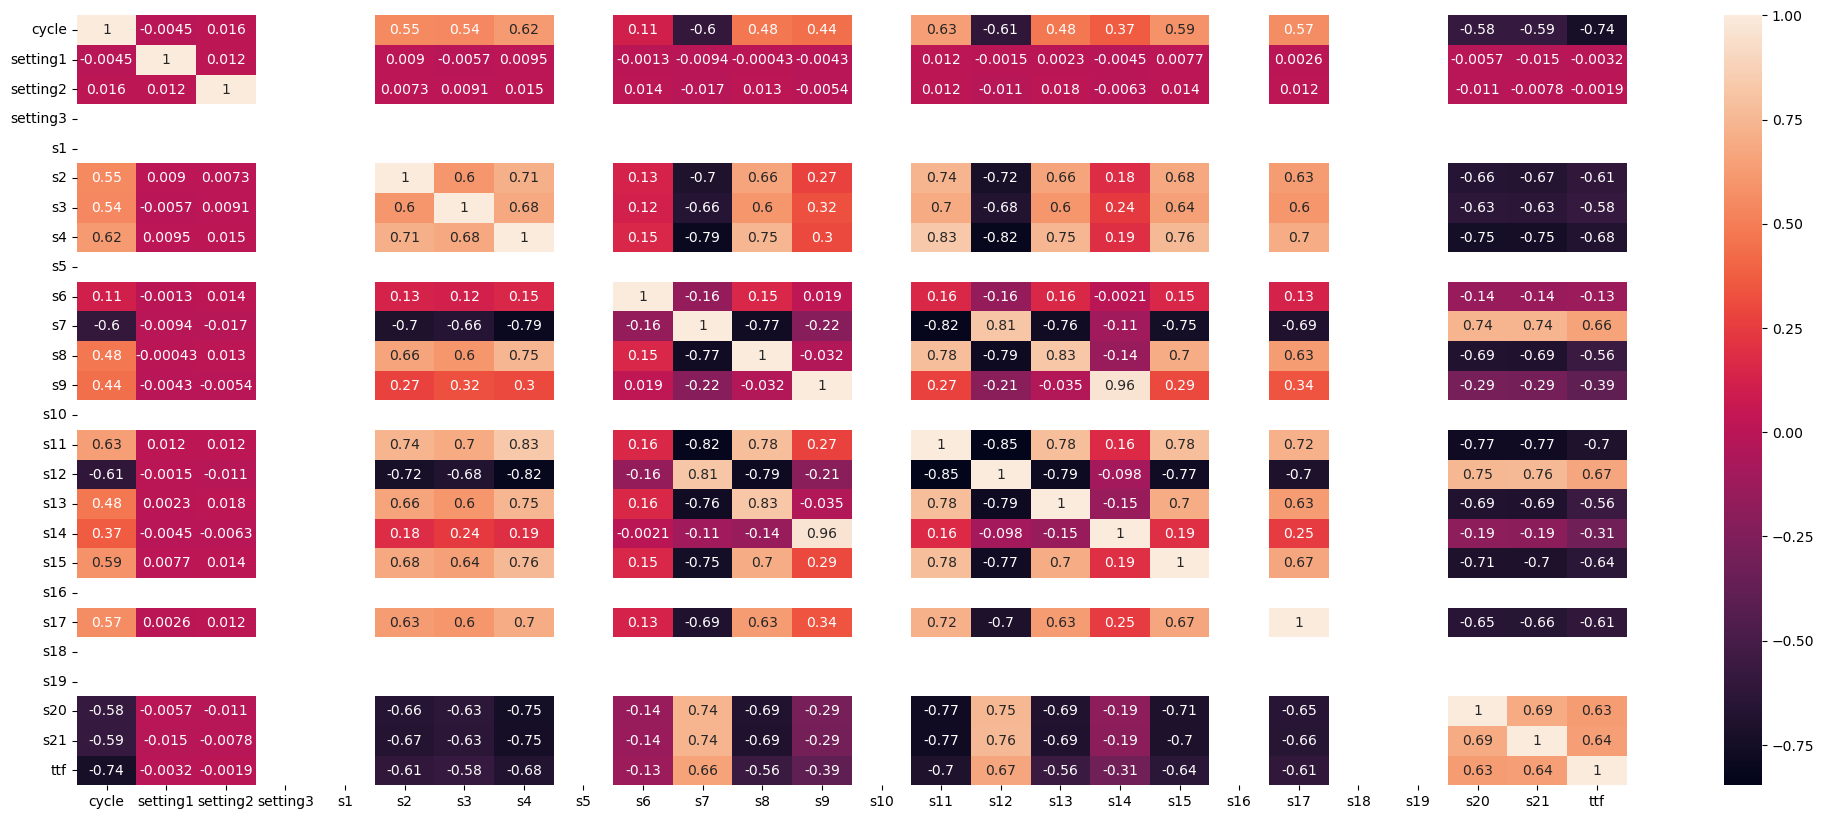

In [16]:
fig, ax = plt.subplots(figsize=(25, 10))

sns.heatmap(df.corr(), ax=ax, annot=True)

## 2.Y. Observations

## 2.Z. Conclusions

# 3. Outlier Detection

## 3.A. Boxplot Visualization

<AxesSubplot:>

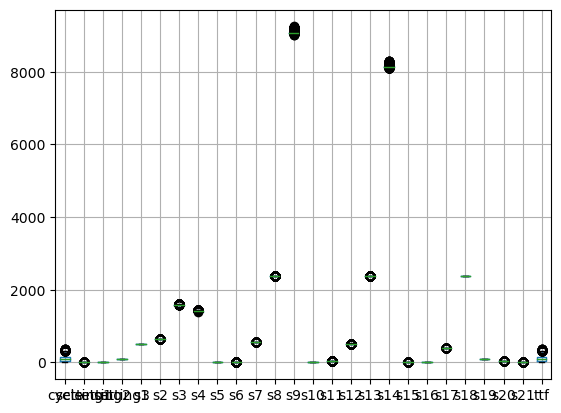

In [4]:
df.boxplot()

As we can see, the data in the previous boxplot is pretty much unreadable.
Let's now normalize the data applying a MinMax scaler and plot again.

<AxesSubplot:>

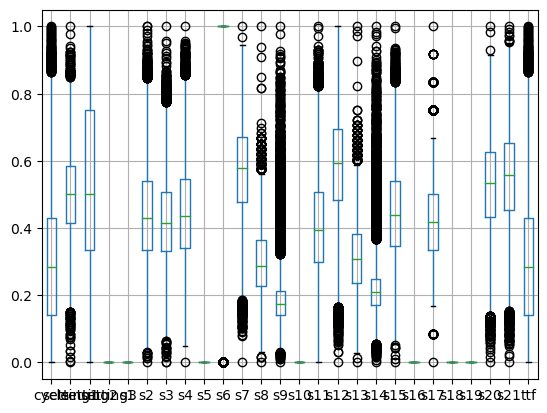

In [5]:
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled, columns=df.columns)
df_normalized.boxplot()

Much better, to visualize even better let's separate the various columns and add a dropdown to select each.

Dropdown(options=('cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8',…

<AxesSubplot:>

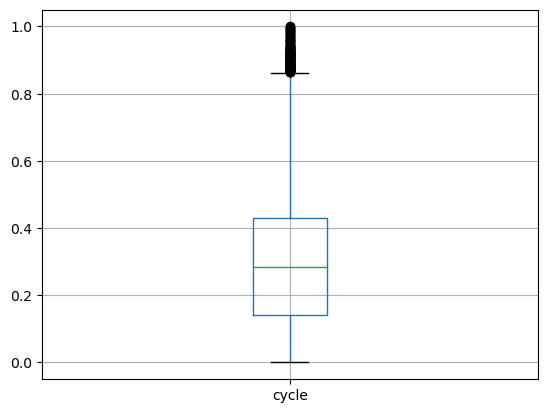

In [6]:
drop_down_boxplot = Dropdown(options = df_normalized.columns)
selected_boxplot = drop_down_boxplot.value

def dropdown_boxplot_handler(change):
    selected_boxplot = change.new 
    clear_output(wait=True)
    df_normalized.boxplot(column=selected_boxplot, return_type='axes')
    display(drop_down_boxplot)
    
drop_down_boxplot.observe(dropdown_boxplot_handler, names='value')
display(drop_down_boxplot)
df_normalized.boxplot(column=selected_boxplot, return_type='axes')

## 3.B Scatterplot visualization

## 3.C Statistical Methods

## 3.Y. Observations

## 3.Z. Conclusions

# 4. Data changes

## 4.A. Correlated feature removal

## 4.B. Outlier removal

## 4.C. Data normalization

## 4.D. Data splitting

## 4.E. Data exporting